In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import folium

Earth Surface temperature visualization - kaggle dataset link https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv


Below are the analytical tasks completed in the project :

- What country had the largest temperature change in the last 100 years?
- Visualize a world map of the temperature change
- What was the temperature change and the overall temperature trends by continent?
- How much will the global temperature change in the next 20 years?

### Read in the data and clean nan

In [2]:
data = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
data.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [4]:
#handle the nas. ffil will be the most accurate thing to reduce cutting off data and skeweness

In [5]:
data = data.ffill(axis = 0) 

In [6]:
data.describe()

AverageTemperature  AverageTemperatureUncertainty
count       577462.000000                  577462.000000
mean            17.399923                       1.077051
std             10.832390                       1.218259
min            -37.658000                       0.052000
25%             10.354000                       0.333000
50%             21.271000                       0.617000
75%             25.777000                       1.340000
max             38.842000                      15.003000

In [7]:
data.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01              19.759                          0.717   

         Country  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe

In [8]:
# Create a column that will store the month
data['month'] = pd.DatetimeIndex(data['dt']).month

# Create a column that will store the year
data['year'] = pd.DatetimeIndex(data['dt']).year


In [9]:
data.head(2)

dt  AverageTemperature  AverageTemperatureUncertainty Country  \
0  1743-11-01               4.384                          2.294   Åland   
1  1743-12-01               4.384                          2.294   Åland   

   month  year  
0     11  1743  
1     12  1743

In [11]:
data2 = data.loc[data['year'] == 2013]

In [12]:
data3 = data.loc[data['year'] == 1990]

In [15]:
data1.head()

year  Country       
1900  Afghanistan       13.749333
      Africa            23.991500
      Albania           13.068583
      Algeria           22.864167
      American Samoa    26.273500
Name: AverageTemperature, dtype: float64

In [16]:
data2 = data2.groupby(["year", 'Country'])["AverageTemperature"].mean()

In [17]:
data3 = data3.groupby(["year", 'Country'])["AverageTemperature"].mean()

In [19]:
df_merged1 = pd.merge(data2,data3, on = 'Country')

In [21]:
df_merged1['T_diff'] = (df_merged1['AverageTemperature_x'] - df_merged1['AverageTemperature_y']).abs()

In [23]:
df_merged1 = df_merged1.reset_index()

In [24]:
df_merged.head(3)

Country  AverageTemperature_x  AverageTemperature_y    T_diff
0  Afghanistan             13.749333             17.588889  3.839556
1       Africa             23.991500             25.286778  1.295278
2      Albania             13.068583             16.082667  3.014083

### What countries experienced the highest Temperature difference in the past 100 years?

In [25]:
df_merged_sorted = df_merged.sort_values('T_diff', ascending = False)

In [26]:
df_merged_sorted.head(10)

Country  AverageTemperature_x  AverageTemperature_y    T_diff
229    Uzbekistan             11.415000             17.299000  5.884000
111    Kazakhstan              4.476500             10.308333  5.831833
220  Turkmenistan             13.924833             19.673333  5.748500
140      Mongolia             -1.169333              4.364000  5.533333
175        Russia             -5.874333             -0.476222  5.398111
74        Finland              0.000500              5.291667  5.291167
116    Kyrgyzstan              2.762000              7.396111  4.634111
15     Azerbaijan             10.582500             15.181111  4.598611
101          Iran             17.121667             21.533444  4.411778
10        Armenia              8.243750             12.477000  4.233250

In [27]:

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

### Create a world map with darker color for the countries that experienced the highest Temperature difference in the last 100 years

In [28]:
import wget 
# download countries geojson file
#!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
world_geo = wget.download( 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json')    
print('GeoJSON file downloaded!')

100% [............................................................................] 252515 / 252515GeoJSON file downloaded!


In [29]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_merged,
    columns=['Country', 'T_diff'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='T diff in last 100 years'
)

# display map
world_map

### Within the 6 continents, how were the temperature trends and which one experienced the highest temperature increase?

In [30]:
import matplotlib.pyplot as plt

In [31]:
df = data.copy()

In [32]:
lista = ['Europe', 'Africa','Asia', 'North America', 'South America', 'Oceania']

In [33]:
data = data.loc[data['Country'].isin(lista)]

In [34]:
data = data.loc[data['year'] > 1900]

In [35]:
data.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country  \
5957  1901-01-01              20.989                          0.479  Africa   
5958  1901-02-01              22.594                          0.579  Africa   
5959  1901-03-01              24.053                          0.344  Africa   
5960  1901-04-01              25.204                          0.387  Africa   
5961  1901-05-01              25.428                          0.332  Africa   

      month  year  
5957      1  1901  
5958      2  1901  
5959      3  1901  
5960      4  1901  
5961      5  1901

In [36]:
datax = data.groupby(["year", 'Country'])["AverageTemperature"].mean()

In [37]:
datax = datax.reset_index()

In [38]:
pivot = datax.pivot_table(values = 'AverageTemperature', index = 'year', columns = 'Country')

In [39]:
pivot.head(3)

Country     Africa      Asia    Europe  North America    Oceania  \
year                                                               
1901     24.081417  7.395250  7.757083       2.042000  21.391833   
1902     23.901917  6.922917  6.916417       1.980667  21.345333   
1903     23.683917  7.101083  8.004917       1.669833  21.018083   

Country  South America  
year                    
1901         21.849667  
1902         21.780417  
1903         21.601417

In [40]:
pivot['dt_Africa'] = pivot['Africa'] - pivot.iloc[0,0]
pivot['dt_Asia'] = pivot['Asia'] - pivot.iloc[0,1]
pivot['dt_Europe'] = pivot['Europe'] - pivot.iloc[0,2]
pivot['dt_North America'] = pivot['North America'] - pivot.iloc[0,3]
pivot['dt_South America'] = pivot['South America'] - pivot.iloc[0,4]
pivot['dt_Oceania'] = pivot['Oceania'] - pivot.iloc[0,5]



In [41]:
pivot.head(3)

Country     Africa      Asia    Europe  North America    Oceania  \
year                                                               
1901     24.081417  7.395250  7.757083       2.042000  21.391833   
1902     23.901917  6.922917  6.916417       1.980667  21.345333   
1903     23.683917  7.101083  8.004917       1.669833  21.018083   

Country  South America  dt_Africa   dt_Asia  dt_Europe  dt_North America  \
year                                                                       
1901         21.849667     0.0000  0.000000   0.000000          0.000000   
1902         21.780417    -0.1795 -0.472333  -0.840667         -0.061333   
1903         21.601417    -0.3975 -0.294167   0.247833         -0.372167   

Country  dt_South America  dt_Oceania  
year                                   
1901             0.457833   -0.457833  
1902             0.388583   -0.504333  
1903             0.209583   -0.831583

### Plot the temperature difference by contintent

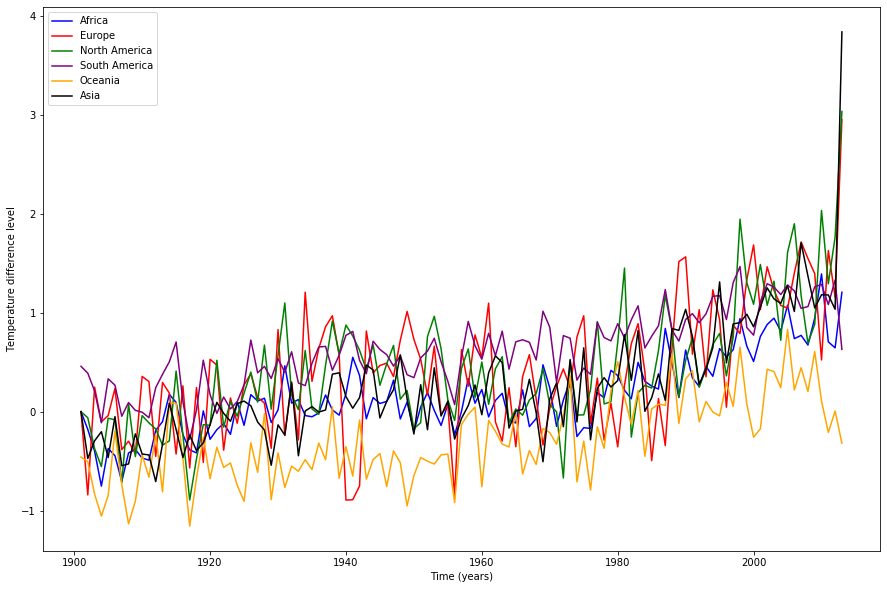

In [44]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

fig, ax = plt.subplots()


plot_timeseries(ax, pivot.index, pivot['dt_Africa'], "blue", "Time (years)", "Temperature difference level")
plot_timeseries(ax, pivot.index, pivot['dt_Europe'], "red", "Time (years)", "Temperature difference level")
plot_timeseries(ax, pivot.index, pivot['dt_North America'], "green", "Time (years)", "Temperature difference level")
plot_timeseries(ax, pivot.index, pivot['dt_South America'], "purple", "Time (years)", "Temperature difference level")
plot_timeseries(ax, pivot.index, pivot['dt_Oceania'], "orange", "Time (years)", "Temperature difference level")
plot_timeseries(ax, pivot.index, pivot['dt_Asia'], "black", "Time (years)","Temperature difference level")

# Add a legend
plt.legend(["Africa", "Europe","North America", "South America", "Oceania","Asia"])

fig.set_size_inches([15,10])

In [45]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

### Plot the overall temperature reading by continent

In [46]:
#plot actual and predicted
plot_data = [
    go.Scatter(
        x=pivot.index,
        y=pivot['Africa'],
        name='T in Africa'
    ),
    
      go.Scatter(
        x=pivot.index,
        y=pivot['Europe'],
        name='T in Europe'
    ),
    
     go.Scatter(
        x=pivot.index,
        y=pivot['North America'],
        name='T in North America'
    ),
    
     go.Scatter(
        x=pivot.index,
        y=pivot['South America'],
        name='T in South America'
    ),
    
     go.Scatter(
        x=pivot.index,
        y=pivot['Asia'],
        name='T in Asia'
    ),
    
    go.Scatter(
        x=pivot.index,
        y=pivot['Oceania'],
        name='T in Oceani'
    )
]

plot_layout = go.Layout(
        title='Temperature'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

### Forecast the next 20 years temperature values - ovrall temperature in Celsius

In [48]:
dataxx = df.groupby(["year"])["AverageTemperature"].mean()

In [49]:
dataxx = dataxx.reset_index()

In [50]:
dataxx['year'] = dataxx['year'].apply(str) + '-01-01'

In [51]:
dataxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
year                  271 non-null object
AverageTemperature    271 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [52]:
dff = dataxx.rename(columns={'year': 'ds',
                        'AverageTemperature': 'y'})

dff.head(5)

ds         y
0  1743-01-01  5.184140
1  1744-01-01  9.279158
2  1745-01-01  4.876122
3  1746-01-01  6.620620
4  1747-01-01  6.620620

In [53]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
ds    271 non-null object
y     271 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [81]:
dff = dff.loc[dff['ds'] >= '1850-01-01']

In [82]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [83]:
model = Prophet(weekly_seasonality=True)
model.fit(dff)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
future = model.make_future_dataframe(periods=20, freq = 'y')
future.tail()

ds
179 2028-12-31
180 2029-12-31
181 2030-12-31
182 2031-12-31
183 2032-12-31

In [85]:
forecast = model.predict(future)

In [86]:
forecast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
179 2028-12-31  19.964487   19.848998   20.243665    19.902654    20.021648   
180 2029-12-31  19.991607   19.934110   20.333012    19.924044    20.056431   
181 2030-12-31  20.018727   19.931650   20.346337    19.945853    20.089036   
182 2031-12-31  20.045848   19.927700   20.352925    19.964893    20.121981   
183 2032-12-31  20.073042   20.002262   20.423469    19.984367    20.157184   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
179        0.091559              0.091559              0.091559 -0.069462   
180        0.153769              0.153769              0.153769  0.018669   
181        0.122458              0.122458              0.122458  0.014609   
182        0.093922              0.093922              0.093922  0.014619   
183        0.150165              0.150165              0.150165 -0.010857   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
179     -0.069462     -0.069462  0.161021      0.161021      0.161021   
180      0.018669      0.018669  0.135100      0.135100      0.135100   
181      0.014609      0.014609  0.107849      0.107849      0.107849   
182      0.014619      0.014619  0.079303      0.079303      0.079303   
183     -0.010857     -0.010857  0.161021      0.161021      0.161021   

     multiplicative_terms  multiplicative_terms_lower  \
179                   0.0                         0.0   
180                   0.0                         0.0   
181                   0.0                         0.0   
182                   0.0                         0.0   
183                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
179                         0.0  20.056046  
180                         0.0  20.145376  
181                         0.0  20.141185  
182                         0.0  20.139770  
183                         0.0  20.223207

In [87]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds       yhat  yhat_lower  yhat_upper
179 2028-12-31  20.056046   19.848998   20.243665
180 2029-12-31  20.145376   19.934110   20.333012
181 2030-12-31  20.141185   19.931650   20.346337
182 2031-12-31  20.139770   19.927700   20.352925
183 2032-12-31  20.223207   20.002262   20.423469

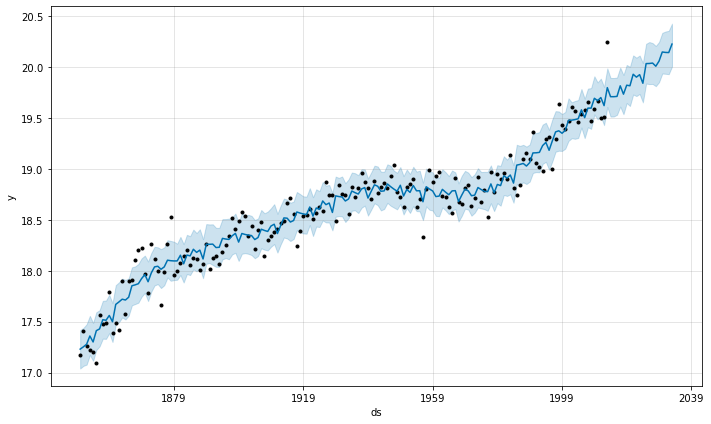

In [88]:
model.plot(forecast);


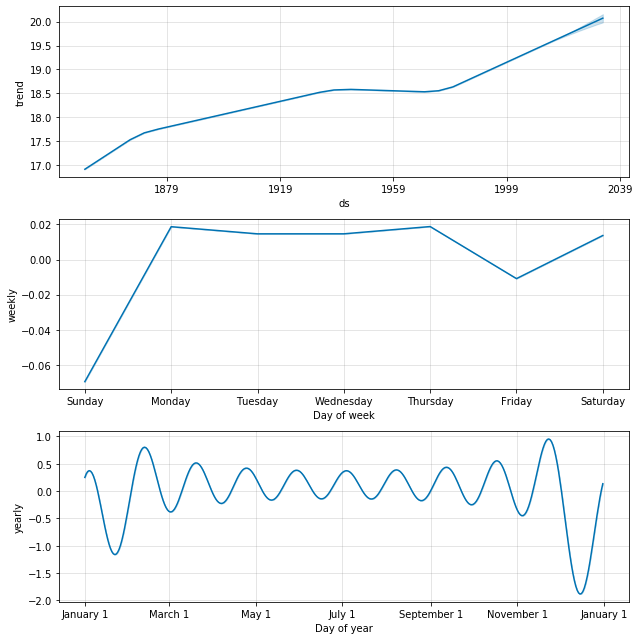

In [89]:
model.plot_components(forecast);


In [90]:
metric_df = forecast.set_index('ds')[['yhat']].join(dff.set_index('ds').y).reset_index()


In [91]:
metric_df.tail()

ds       yhat   y
179 2028-12-31  20.056046 NaN
180 2029-12-31  20.145376 NaN
181 2030-12-31  20.141185 NaN
182 2031-12-31  20.139770 NaN
183 2032-12-31  20.223207 NaN

### Forecast the next 20 years temperature difference values - overall temperature difference in Celsius

In [66]:
dataxx.head()

year  AverageTemperature
0  1743-01-01            5.184140
1  1744-01-01            9.279158
2  1745-01-01            4.876122
3  1746-01-01            6.620620
4  1747-01-01            6.620620

In [67]:
dataxx['AverageTemperature'] = dataxx['AverageTemperature'] - dataxx.iloc[0,1]

In [68]:
dataxx.head(2)

year  AverageTemperature
0  1743-01-01            0.000000
1  1744-01-01            4.095018

In [69]:
dfff = dataxx.rename(columns={'year': 'ds',
                        'AverageTemperature': 'y'})

dfff.head(5)

ds         y
0  1743-01-01  0.000000
1  1744-01-01  4.095018
2  1745-01-01 -0.308018
3  1746-01-01  1.436480
4  1747-01-01  1.436480

In [75]:
dfff = dfff.loc[dfff['ds'] >= '1850-01-01']

In [76]:
model2 = Prophet(weekly_seasonality=True)
model2.fit(dfff)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [77]:
future2 = model2.make_future_dataframe(periods=20, freq = 'y')
future2.tail()

ds
179 2028-12-31
180 2029-12-31
181 2030-12-31
182 2031-12-31
183 2032-12-31

In [78]:
forecast2 = model2.predict(future2)

In [79]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds       yhat  yhat_lower  yhat_upper
179 2028-12-31  14.863836   14.659251   15.066836
180 2029-12-31  14.950802   14.741981   15.156545
181 2030-12-31  14.943487   14.731762   15.154141
182 2031-12-31  14.937717   14.723671   15.157801
183 2032-12-31  15.030537   14.811017   15.237112

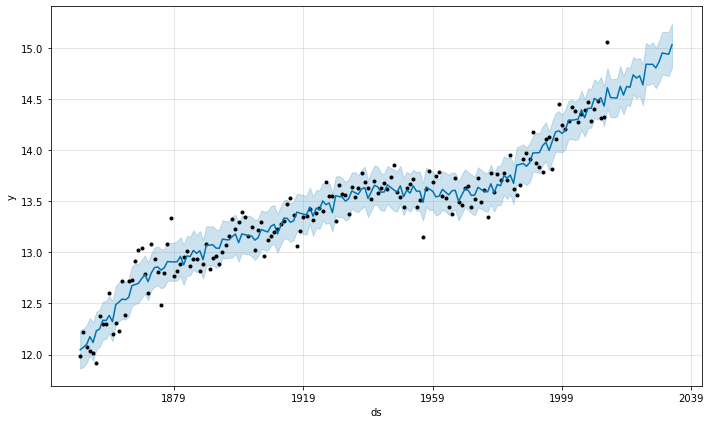

In [80]:
model2.plot(forecast2);


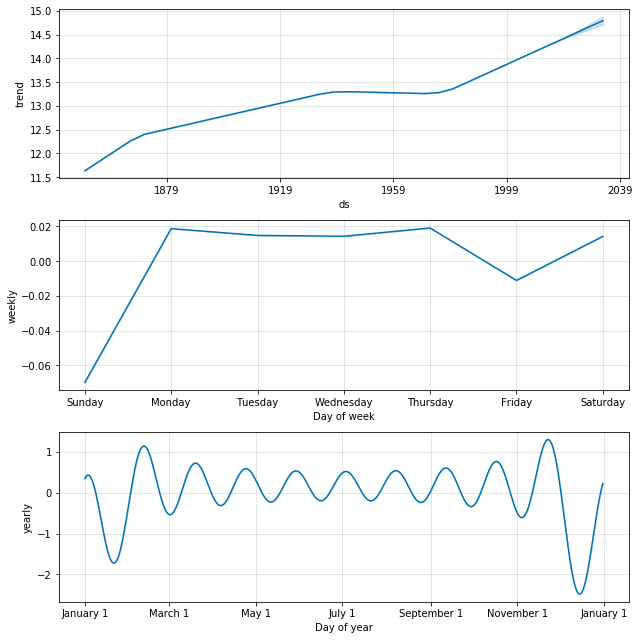

In [93]:
model2.plot_components(forecast2);
